In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
from matplotlib import font_manager

f_path = "C:/windows/Fonts/malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()
rc('font', family='Malgun Gothic')

C:\Users\art\anaconda3\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\art\anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\art\anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv("./done/경찰청_연도별 음주운전 재범자 단속 실적 현황_20221231.csv", encoding='cp949')

In [3]:
df

,년도,1회,2회,3회,4회,5회,6회,7회이상
0,2010,179086,79314,30103,9705,3118,903,478
1,2011,151488,67195,26172,8925,3017,929,487
2,2012,142803,63990,25607,9094,3179,1085,525
3,2013,154992,69863,28862,10391,3718,1285,725
4,2014,142258,64813,28183,10534,3775,1396,829
5,2015,135096,63018,27552,10810,4171,1556,897
6,2016,125736,57666,25856,10494,4131,1599,1117
7,2017,114585,51130,23396,9364,3896,1527,1289
8,2018,90168,40648,19025,7884,3189,1280,866
9,2019,73572,31487,14693,6416,2696,1102,806


In [4]:
# 1회~7회 이상까지의 column 선택
cols = df.columns[1:8]
print(cols)
# '총합' column 추가하고 1회~7회 이상 데이터 합산하여 저장
df['총합'] = df[cols].sum(axis=1)

df

Index([' 1회 ', ' 2회 ', ' 3회 ', ' 4회 ', ' 5회 ', ' 6회 ', ' 7회이상 '], dtype='object')


,년도,1회,2회,3회,4회,5회,6회,7회이상,총합
0,2010,179086,79314,30103,9705,3118,903,478,302707
1,2011,151488,67195,26172,8925,3017,929,487,258213
2,2012,142803,63990,25607,9094,3179,1085,525,246283
3,2013,154992,69863,28862,10391,3718,1285,725,269836
4,2014,142258,64813,28183,10534,3775,1396,829,251788
5,2015,135096,63018,27552,10810,4171,1556,897,243100
6,2016,125736,57666,25856,10494,4131,1599,1117,226599
7,2017,114585,51130,23396,9364,3896,1527,1289,205187
8,2018,90168,40648,19025,7884,3189,1280,866,163060
9,2019,73572,31487,14693,6416,2696,1102,806,130772


In [5]:
cols

Index([' 1회 ', ' 2회 ', ' 3회 ', ' 4회 ', ' 5회 ', ' 6회 ', ' 7회이상 '], dtype='object')

In [6]:
cols = [col.strip() for col in df.columns]
df.columns = cols
df.columns

Index(['년도', '1회', '2회', '3회', '4회', '5회', '6회', '7회이상', '총합'], dtype='object')

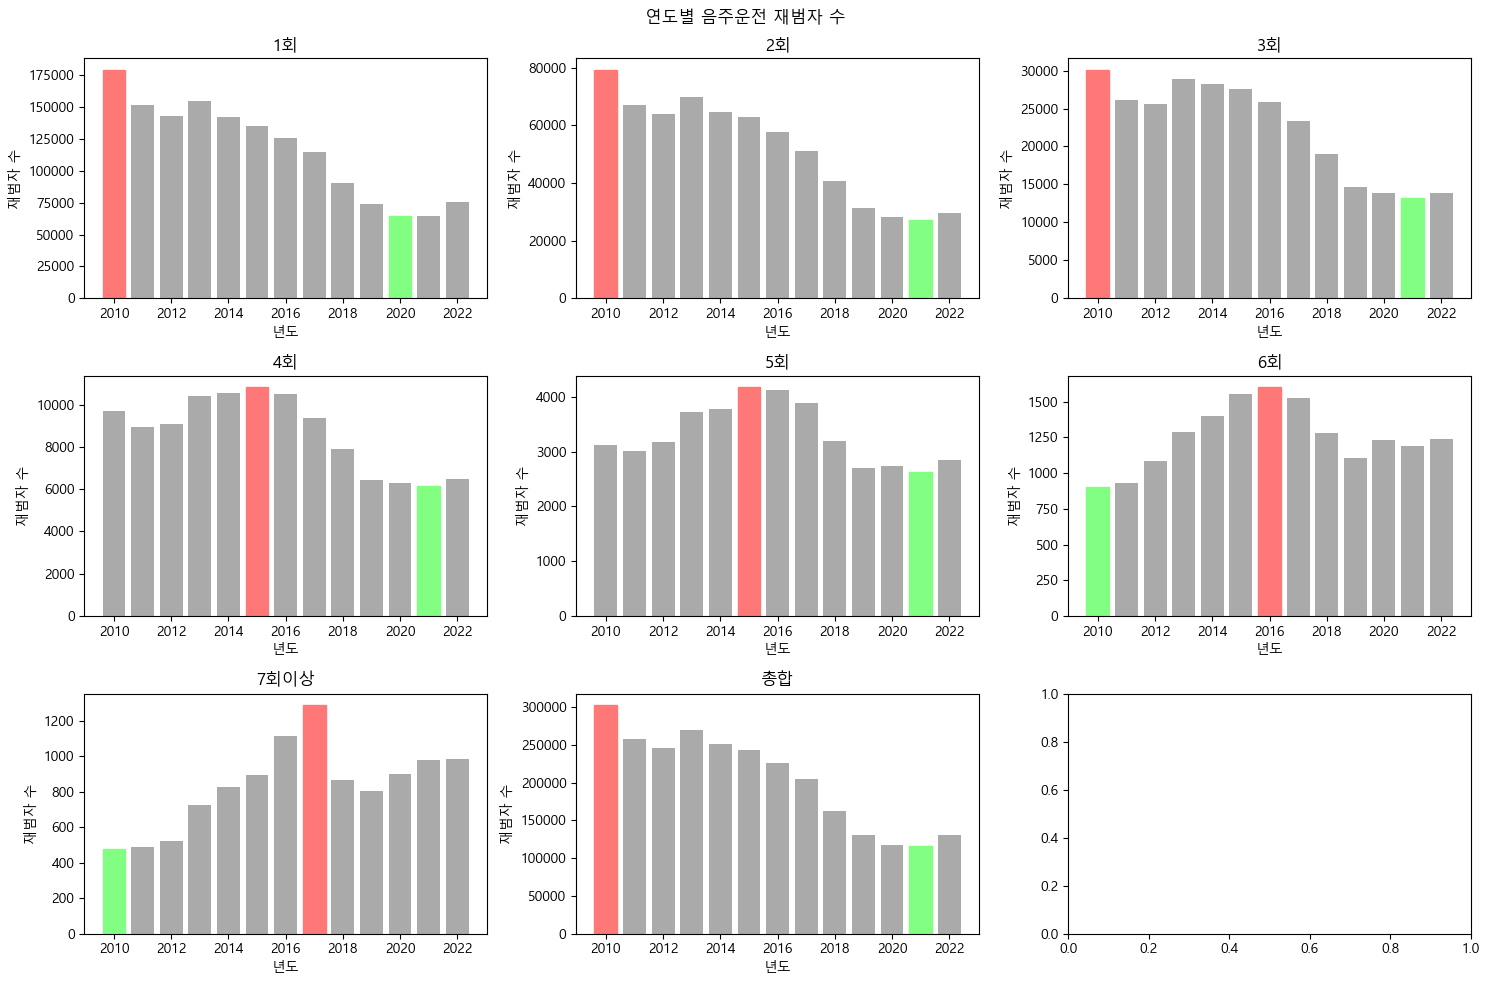

In [7]:
counts = df.drop('년도', axis=1)

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
axs = axs.flatten()

# 각 재범 횟수에 대해 가장 높은 값과 가장 낮은 값을 구합니다.
max_vals = counts.max().values
min_vals = counts.min().values

# 파스텔 [적색, 녹색, 회색]을 RGB 값으로 지정합니다.
pastel_red = (255/255, 120/255, 120/255)
pastel_green = (130/255, 255/255, 130/255)
pastel_gray = (170/255, 170/255, 170/255)

for i, col in enumerate(counts.columns):
    # 각 재범 횟수에 대해 바 그래프를 그립니다.
    # 각 막대의 색을 파스텔 회색으로 합니다.
    bars = axs[i].bar(df['년도'], counts[col], color=pastel_gray)
    
    # 막대의 높이가 최댓값에 해당하는 경우 색을 파스텔 적색으로 변경합니다.
    # 막대의 높이가 최솟값에 해당하는 경우 색을 파스텔 녹색으로 변경합니다.
    for j, val in enumerate(counts[col].values):
        if val == max_vals[i]:
            bars[j].set_color(pastel_red)
        elif val == min_vals[i]:
            bars[j].set_color(pastel_green)
    
    axs[i].set_title(f'{col}')
    axs[i].set_xlabel('년도')
    axs[i].set_ylabel('재범자 수')

fig.suptitle('연도별 음주운전 재범자 수')
plt.tight_layout()
plt.show()


In [16]:
%pwd

'C:\\WORKSPACE-PYTHON\\multicampus\\drunk\\data'

In [17]:
df3 = pd.read_csv('연도별 재범률.cvs', encoding='cp949')

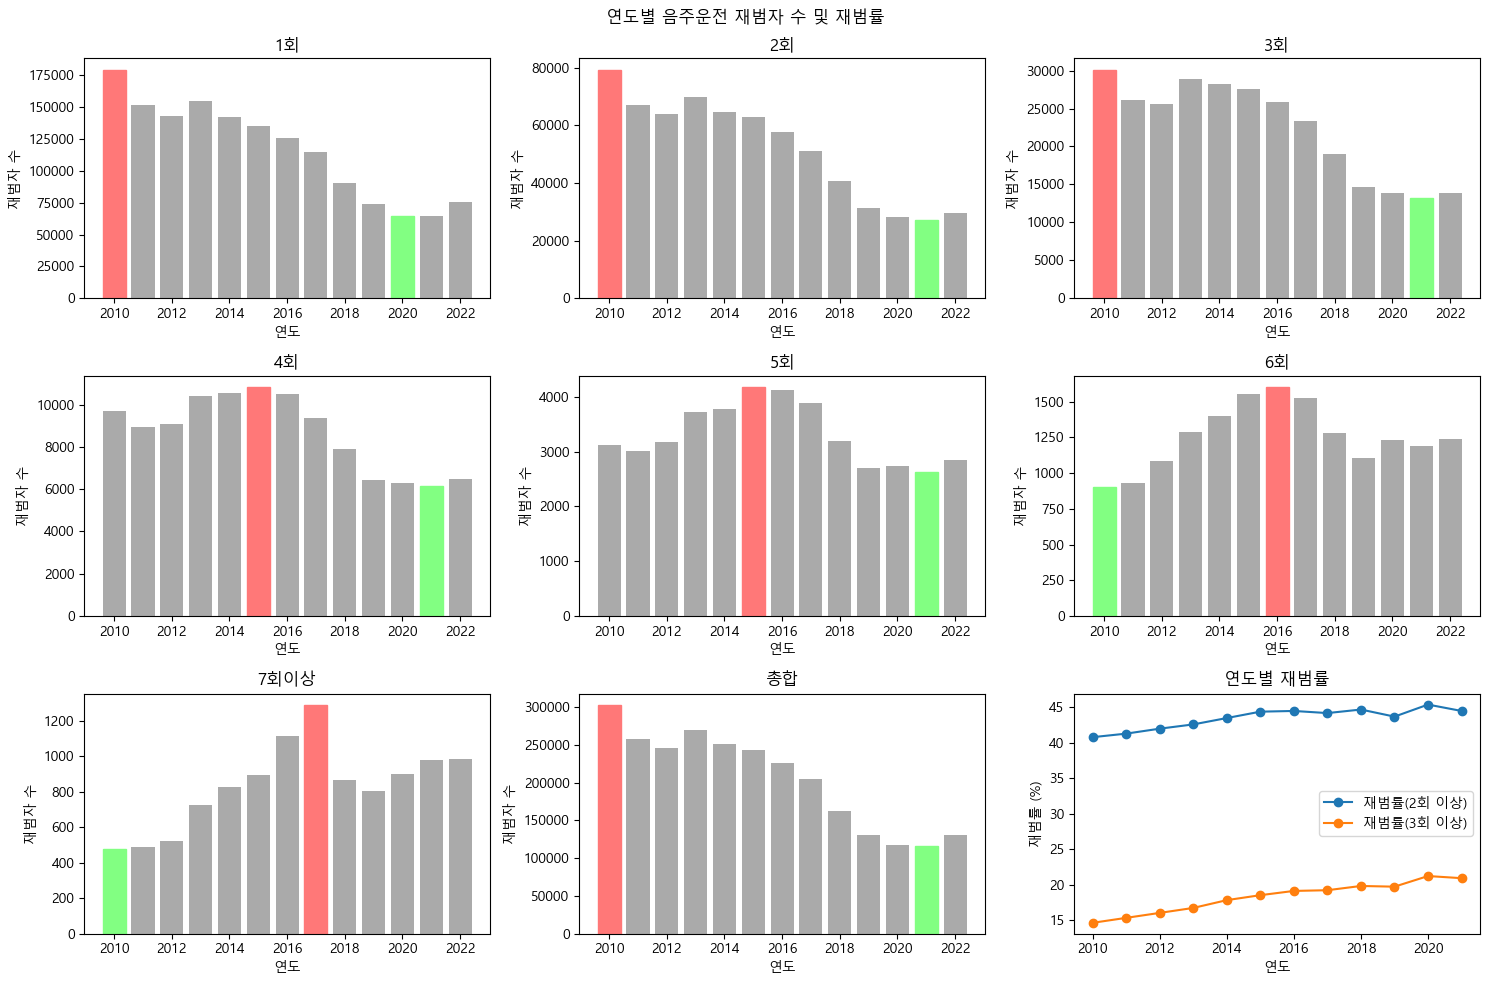

In [20]:
import matplotlib.pyplot as plt

# subplot 그래프
counts = df.drop('년도', axis=1)

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axs = axs.flatten()

# 각 재범 횟수에 대해 가장 높은 값과 가장 낮은 값을 구합니다.
max_vals = counts.max().values
min_vals = counts.min().values

# 파스텔 [적색, 녹색, 회색]을 RGB 값으로 지정합니다.
pastel_red = (255/255, 120/255, 120/255)
pastel_green = (130/255, 255/255, 130/255)
pastel_gray = (170/255, 170/255, 170/255)

for i, col in enumerate(counts.columns):
    # 각 재범 횟수에 대해 바 그래프를 그립니다.
    # 각 막대의 색을 파스텔 회색으로 합니다.
    bars = axs[i].bar(df['년도'], counts[col], color=pastel_gray)

    # 막대의 높이가 최댓값에 해당하는 경우 색을 파스텔 적색으로 변경합니다.
    # 막대의 높이가 최솟값에 해당하는 경우 색을 파스텔 녹색으로 변경합니다.
    for j, val in enumerate(counts[col].values):
        if val == max_vals[i]:
            bars[j].set_color(pastel_red)
        elif val == min_vals[i]:
            bars[j].set_color(pastel_green)

    axs[i].set_title(f'{col}')
    axs[i].set_xlabel('연도')
    axs[i].set_ylabel('재범자 수')

# 개별 그래프
plt.subplot(3, 3, 9)
plt.plot(df3['연도'], df3['재범률(2회 이상)'], marker='o', label='재범률(2회 이상)')
plt.plot(df3['연도'], df3['재범률(3회 이상)'], marker='o', label='재범률(3회 이상)')
plt.xlabel('연도')
plt.ylabel('재범률 (%)')
plt.title('연도별 재범률')
plt.legend()

fig.suptitle('연도별 음주운전 재범자 수 및 재범률')
plt.tight_layout()
plt.show()